# Extracting the relavent data in a desired format from BMRB "fullcs.lst" file
### Latest file can be obtained using the link below 
#### http://www.bmrb.wisc.edu/ftp/pub/bmrb/statistics/chem_shifts/common/fullcs.lst

In [88]:
import numpy as np
import pandas as pd

## Fullcs.lst 

In [89]:
# fullcs.lst downloaded in APR-2017
df=pd.read_csv('fullcs-APR17.lst',header=None, low_memory=False)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7817751 entries, 0 to 7817750
Data columns (total 10 columns):
0    int64
1    object
2    object
3    int64
4    object
5    object
6    object
7    object
8    float64
9    object
dtypes: float64(1), int64(2), object(7)
memory usage: 596.4+ MB


In [91]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,1000,protein,insulin A chain,305,14,TYR,HD1,H,7.12,1
1,1000,protein,insulin A chain,306,14,TYR,HD2,H,7.12,1
2,1000,protein,insulin A chain,307,14,TYR,HE1,H,6.82,1
3,1000,protein,insulin A chain,308,14,TYR,HE2,H,6.82,1
4,1000,protein,insulin A chain,305,19,TYR,HD1,H,7.30,1


### Drop the columns not required for our analysis

In [92]:
df.drop([2,3,7,9],axis=1,inplace=True)

In [93]:
df.head()

,0,1,4,5,6,8
0,1000,protein,14,TYR,HD1,7.12
1,1000,protein,14,TYR,HD2,7.12
2,1000,protein,14,TYR,HE1,6.82
3,1000,protein,14,TYR,HE2,6.82
4,1000,protein,19,TYR,HD1,7.30


### Retain only the protein data 

In [94]:
# What others are present in the data?
df[1].unique()

array(['protein', 'RNA', 'carbohydrate', 'ligand', 'DNA'], dtype=object)

In [95]:
### drop other than proteins
df.drop(df[df[1]!='protein'].index,inplace=True)

### Retain data of 20 common amino acids

In [96]:
# what are all the amino acids in the list?
df[5].unique()

array(['TYR', 'ILE', 'ASN', 'TRP', 'LYS', 'GLY', 'ALA', 'MET', 'LEU',
       'CLE', 'SER', 'PRO', 'CYS', 'GLU', 'ASP', 'VAL', 'THR', 'ARG',
       'GLN', 'PHE', 'HIS', 'ILE_NH2', 'LYS_NH2', 'NH2', 'M3L', 'ALY',
       'SEP', 'PTR', 'B27', 'DL', 'DV', 'AAC', 'AYA', 'ACE', 'PCA', 'PHF',
       'AIB', 'DIV', 'HYP', 'PHL', 'DLE', 'DP', 'DS', 'DQ', 'TPO', 'NLE',
       'DPN', 'MEA', '2ML', 'MLZ', 'MGY', 'DSE', 'MNV', 'MethylSER',
       'ALA_AC', 'NFA', 'FTR', 'ORN', 'CHA', 'ALO', 'ABA', 'DHAX', 'DHBX',
       'ALAS', 'ABUX', 'DSG', 'DAL', 'DSN', 'MEG', 'KYN', 'TYS', 'NLQ',
       'SET', 'CYC', 'LYS_AC', 'THR_AC', 'NAL', 'DNS', 'PFX', 'FME', 'CSE',
       'DGL', 'HEM_ox', 'PNS', 'LYR', '2KT', 'DHA', 'DBU', 'MLY', 'GPR',
       'SAC', 'MYR', 'DPR', 'QUA', 'BB9', 'DCY', 'TS9', 'MH6', 'GYC',
       'CY1', 'MK8', 'CEL', 'DTH', 'DTY', 'GND', 'M2L', 'CYM', 'TME',
       'SRA', 'DAS', 'SNC', 'MSE', 'CY3', 'ABU', 'CRO', 'DAB', 'DLY',
       'CGU', 'DBB', 'BEZ', 'M9P', 'MOZ', 'MH7', '3GL', 'NO1', '5

In [97]:
# 20 common amino acids
aa20=['ALA','ARG','ASN','ASP','CYS','GLN','GLU','GLY','HIS','ILE','LEU','LYS','MET','PHE','PRO','SER','THR','TRP','TYR','VAL']

In [98]:
# retain the only data of 20 common amino acids
df.drop(df[~df[5].isin(aa20)].index, inplace=True)

### Retain data of back bone and few side chain atoms 

In [99]:
# what are all the atoms we have?
df[6].unique()

array(['HD1', 'HD2', 'HE1', 'HE2', 'C', 'CA', 'CB', 'CD1', 'CG1', 'CG2',
       'N', 'CG', 'ND2', 'CD2', 'CE2', 'CE3', 'CH2', 'CZ2', 'CZ3', 'NE1',
       'CD', 'CE', 'NZ', 'HA', 'HB2', 'HB3', 'H', 'HB', 'HG12', 'HG13',
       'HG2', 'HG3', 'HD3', 'HG', 'HE3', 'HZ2', 'HZ3', 'HH2', 'HG1', 'HA2',
       'HA3', 'HE', 'NE', 'HE21', 'HE22', 'NE2', 'HD21', 'HD22', 'HZ',
       'CE1', 'CZ', 'HH11', 'HH12', 'HH21', 'HH22', 'ND1', 'NH1', 'NH2',
       'HH', 'H2', 'H28', 'H3', 'H42', 'H43', 'H44', 'H45', 'H46', 'H47',
       'H48', 'H49', 'H50', 'C18', 'C19', 'C47', 'C48', 'C49', 'C50'], dtype=object)

In [100]:
# atoms of our interest
atms=['N','H','CA','CB','C','HA','HA2','HA3','HB','HB2','HB3']

In [101]:
# retain the only data of atoms of our interest
df.drop(df[~df[6].isin(atms)].index, inplace=True)

In [102]:
df.head()

,0,1,4,5,6,8
8,10001,protein,1,ILE,C,172.8
9,10001,protein,1,ILE,CA,59.2
10,10001,protein,1,ILE,CB,37.5
14,10001,protein,1,ILE,N,36.9
15,10001,protein,2,ASN,C,175.1


## Pivot the table 

In [103]:
df=df.pivot_table(index=[0,4,5],columns=6,values=8)

In [104]:
df.head()

6          C  CA  CB     H    HA  HA2   HA3    HB   HB2   HB3   N
0 4  5                                                           
3 1  SER NaN NaN NaN   NaN  4.44  NaN   NaN   NaN  4.11  3.93 NaN
  10 ILE NaN NaN NaN  7.72  3.91  NaN   NaN  2.15   NaN   NaN NaN
  11 ILE NaN NaN NaN  8.33  3.46  NaN   NaN  1.91   NaN   NaN NaN
  12 GLY NaN NaN NaN  8.41   NaN  3.7  3.86   NaN   NaN   NaN NaN
  13 GLU NaN NaN NaN  8.20  4.11  NaN   NaN   NaN  2.18  2.24 NaN

#### Save the all protein data in desired structure 

In [105]:
df.to_csv('All_aa.csv')

#### All_aa.csv consists of data related to common 20 amino acids with relavent back bone and few side chain atoms chemical shift information. Missing data is represented by NaN.

## Further cleaning

In [106]:
df=pd.read_csv('All_aa.csv')

In [107]:
# rename columns
#AccNo - BMRB Accession Number
# AANo - Amino acid position in the sequence
df=df.rename(columns={'0':'AccNo','4':'AANo','5':'AA'})

### Data withrespect to particular N-H pair

In [109]:
# re-arrange the columns
df=df[['AccNo', 'AANo', 'AA', 'N','H', 'CA', 'CB','C','HA', 'HA2', 'HA3', 'HB',
       'HB2', 'HB3']]

In [151]:
# data without N-H pair information is of no use 
df.dropna(subset=['N','H'],inplace=True)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800733 entries, 2145 to 946310
Data columns (total 14 columns):
AccNo    800733 non-null int64
AANo     800733 non-null int64
AA       800733 non-null object
N        800733 non-null float64
H        800733 non-null float64
CA       730810 non-null float64
CB       638894 non-null float64
C        533721 non-null float64
HA       526425 non-null float64
HA2      41508 non-null float64
HA3      39780 non-null float64
HB       141080 non-null float64
HB2      347609 non-null float64
HB3      331866 non-null float64
dtypes: float64(11), int64(2), object(1)
memory usage: 91.6+ MB


# For (CA,CB) analysis
#### Gly will be automatically removed as it wont consists of cb
#### Prolene removed as it laks amide proton

In [214]:
df_cacb=df[['AccNo', 'AANo', 'AA', 'N','H', 'CA', 'CB']].copy()

In [217]:
df_cacb.dropna(subset=['CA','CB'],inplace=True)

In [230]:
df_cacb.head()

,AccNo,AANo,AA,N,H,CA,CB
7180,447,10,GLU,126.3,9.45,57.7,29.2
7181,447,11,ALA,122.8,8.35,53.3,16.7
7182,447,12,GLU,115.0,7.23,54.2,29.6
7184,447,14,THR,108.9,7.58,57.9,70.2
7185,447,15,LYS,123.7,8.20,54.0,33.1


In [227]:
for aa in df_cacb['AA'].unique():
    print(aa,'\t',len(df_cacb[df_cacb['AA']==aa]),'\t',len(df_cacb[df_cacb['AA']==aa])*100/len(df_cacb))

GLU 	 56507 	 8.895350118537502
ALA 	 53944 	 8.491881834009716
THR 	 39612 	 6.23573378334556
LYS 	 50965 	 8.022926695652995
HIS 	 15123 	 2.3806675251321545
ILE 	 38156 	 6.006529794944289
VAL 	 49762 	 7.83355004864288
ASP 	 43612 	 6.865415070162237
TYR 	 22125 	 3.482924617704749
LEU 	 63165 	 9.943454620443863
PHE 	 26903 	 4.2350789148072705
GLN 	 30678 	 4.82934062924051
SER 	 44688 	 7.034799336315924
ASN 	 29552 	 4.6520853470016155
MET 	 14738 	 2.320060701276049
ARG 	 35060 	 5.51915647894818
CYS 	 12088 	 1.9028968487600002
TRP 	 8564 	 1.348147635074507


In [228]:
df_cacb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 635242 entries, 7180 to 946310
Data columns (total 7 columns):
AccNo    635242 non-null int64
AANo     635242 non-null int64
AA       635242 non-null object
N        635242 non-null float64
H        635242 non-null float64
CA       635242 non-null float64
CB       635242 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 38.8+ MB


# For (CA,CB,HB) analysis

#### HB include HB, HB2,HB3 
#### How good it is to take average of three?

In [236]:
df_cacbhb=df[['AccNo', 'AANo', 'AA', 'N','H', 'CA', 'CB','HB','HB2','HB3']].copy()

In [237]:
df_cacbhb.dropna(subset=['CA','CB'],inplace=True)

In [243]:
df_cacbhb.dropna(subset=['HB','HB2','HB3'],how='all',inplace=True)

In [247]:
df_cacbhb['hb']=df_cacbhb[['HB','HB2','HB3']].mean(axis=1)

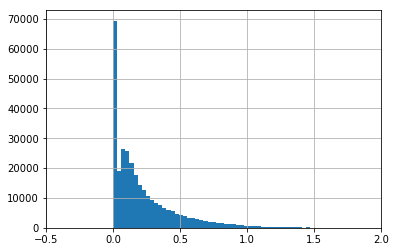

In [266]:
(abs(df_cacbhb['HB2']-df_cacbhb['HB3'])).hist(bins=1000)
plt.xlim(-0.5,2)
plt.show()

#### |hb2-hb3| < 1.0 so their average can be taken as HB

In [282]:
df_cacbhb.drop(['HB','HB2','HB3'],axis=1,inplace=True)

In [284]:
df_cacbhb.rename(columns={'hb':'HB'},inplace=True)

In [285]:
df_cacbhb.head()

,AccNo,AANo,AA,N,H,CA,CB,HB
7180,447,10,GLU,126.3,9.45,57.7,29.2,2.050
7181,447,11,ALA,122.8,8.35,53.3,16.7,1.500
7182,447,12,GLU,115.0,7.23,54.2,29.6,1.845
7184,447,14,THR,108.9,7.58,57.9,70.2,3.830
7185,447,15,LYS,123.7,8.20,54.0,33.1,1.570


### Why HB?

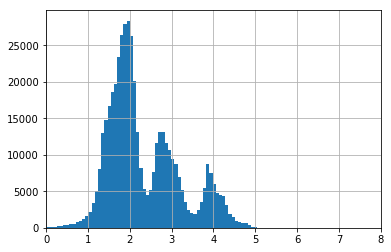

In [297]:
df_cacbhb['HB'].hist(bins=1000)
plt.xlim(0,8)
plt.show()

In [298]:
df_cacbhb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463015 entries, 7180 to 946310
Data columns (total 8 columns):
AccNo    463015 non-null int64
AANo     463015 non-null int64
AA       463015 non-null object
N        463015 non-null float64
H        463015 non-null float64
CA       463015 non-null float64
CB       463015 non-null float64
HB       463015 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 31.8+ MB


In [300]:
df_cacbhb.to_csv('CACBHB.csv')

## 'CACBHB.csv' is the file that consists of all the data required for our analysis both (CA,CB) & (CA,CB,HB) chemical shift spaces